<a href="https://colab.research.google.com/github/JameicaAlvarenga/cadastro_de_clientes/blob/main/ProjetoAdvetureWorks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
#upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criando DataFrame

df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
#Verificando se tem valores ausentes
df.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [5]:
#Configurando formato de numero foat
pd.options.display.float_format='{:20,.2f}'.format


In [6]:
#Vizualizando as 10 primeiras linhas
df.head(10)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
5,2008-07-12,2008-07-20,306,384,19054,200807123CS588,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
6,2008-08-14,2008-08-21,307,384,19103,200808143CS628,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
7,2008-09-29,2008-10-09,307,384,19106,200809293CS637,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
8,2008-10-09,2008-10-19,307,384,19106,200810093CS637,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
9,2008-10-16,2008-10-27,307,384,19107,200810163CS646,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#Quantiade de linhas e colunnas
df.shape

(904, 16)

In [8]:
#Verificando tipo de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Qual foi a receita Total?

df['Valor Venda'].sum()

5984606.1426

In [12]:
#Qual o Custo Total?
#Criando coluna de custo  para poder calcular o custo total.
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade']) 

df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


In [13]:
#Calculando o custo total

round(df['Custo'].sum(),2)

2486783.05

In [14]:
#Calculando lucro com base na receita  e custo total
#Criando coluna de Lucro

df['Lucro'] = df['Valor Venda'] - df['Custo']
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [15]:
#Total Lucro
round(df['Lucro'].sum(),2)

3497823.09

In [16]:
#Criando coluna tempo de envio
df['Tempo Envio(Dias)']=(df['Data Envio'] - df['Data Venda']).dt.days
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio(Dias)
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5


In [17]:
#Media de tempo de envio por marca
media = df.groupby('Marca')['Tempo Envio(Dias)'].mean()
round(media,2)

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio(Dias), dtype: float64

In [69]:
#Produto mais vendido por ano

df.groupby([df['Data Venda'].dt.year,'Produto'])['Quantidade'].sum()

Data Venda  Produto                                        
2008        Adventure Works Laptop15.4W M1548 Black              456
            Adventure Works Laptop15.4W M1548 Red                452
            Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          582
            Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           548
            Fabrikam Trendsetter 1/3'' 8.5mm X200 White          394
            Fabrikam Trendsetter 2/3'' 17mm X100 Black           517
            Fabrikam Trendsetter 2/3'' 17mm X100 Grey            630
            Headphone Adapter for Contoso Phone E130 Silver     7333
            Headphone Adapter for Contoso Phone E130 White      7300
2009        Adventure Works Laptop15.4W M1548 Black              633
            Adventure Works Laptop15.4W M1548 Red                595
            Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          302
            Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           297
            Fabrikam Trendsetter 1/3'' 8.5m

In [18]:
#Criando df de Lucro por ano e por marca
lucro_ano=df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index() 
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


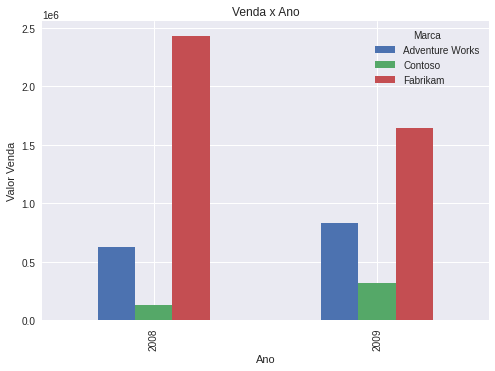

In [66]:
#Venda por ano

Venda_ano=df.groupby([df['Data Venda'].dt.year, 'Marca'])['Valor Venda'].sum().reset_index()
Venda_ano.pivot('Data Venda','Marca','Valor Venda').plot.bar(title="Venda x Ano")
plt.xlabel('Ano')
plt.ylabel('Valor Venda');

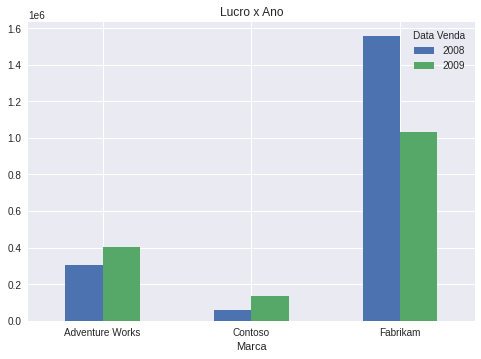

In [65]:
df1=lucro_ano
Lucro=df1.pivot('Marca','Data Venda','Lucro')

Lucro.plot.bar(title='Lucro x Ano')
plt.xticks(rotation = 'horizontal');

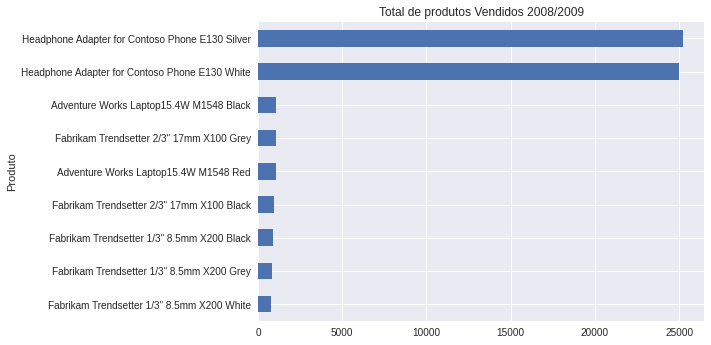

In [76]:
#Total de produtos Vedidos

Total_Produtos =df.groupby("Produto")['Quantidade'].sum().sort_values(ascending=True)
Total_Produtos.plot.barh(title='Total de produtos Vendidos 2008/2009');

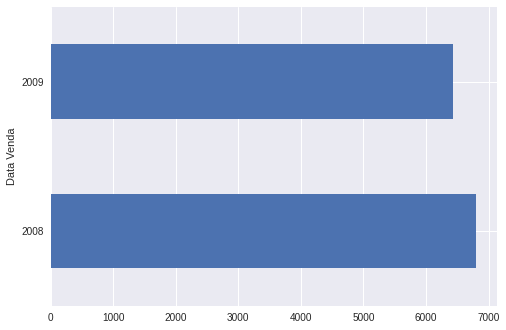

In [99]:
#Tickt Médio por ano

Qtd_Total_Ano=df.groupby([df['Data Venda'].dt.year])['Quantidade'].count()

Valor_Total_Ano=df.groupby([df['Data Venda'].dt.year])['Valor Venda'].sum()

Ticket_Medio=(Valor_Total_Ano / Qtd_Total_Ano).plot.barh("Ticket Médio");


#Venda_ano=df.groupby([df['Data Venda'].dt.year, 'Marca'])['Valor Venda'].sum().

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio(Dias), dtype: float64 {'whiskers': [<matplotlib.lines.Line2D object at 0x7f734cb87510>, <matplotlib.lines.Line2D object at 0x7f734cb87450>], 'caps': [<matplotlib.lines.Line2D object at 0x7f734cbf50d0>, <matplotlib.lines.Line2D object at 0x7f734cbf5e10>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f734cc29810>], 'medians': [<matplotlib.lines.Line2D object at 0x7f734cc33790>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f734cc33850>], 'means': []}


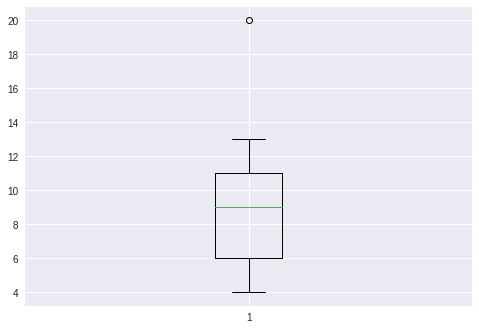

In [111]:
grafico = plt.boxplot(df['Tempo Envio(Dias)']);
dados = df['Tempo Envio(Dias)'].describe()

print(dados, grafico)



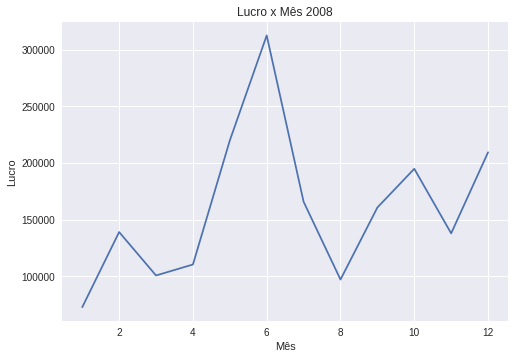

In [120]:
#Venda ano 2008 

df2008 = df[df['Data Venda'].dt.year ==2008]
df2008.groupby([df['Data Venda'].dt.month])['Lucro'].sum().plot(title = 'Lucro x Mês 2008');
plt.xlabel("Mês");
plt.ylabel("Lucro");
